# Sales Predication

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

## Data analysis

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [8]:
df.TV.describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [9]:
df.Radio.describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

In [10]:
df.Newspaper.describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [11]:
df.Sales.describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [12]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [13]:
import seaborn as sns

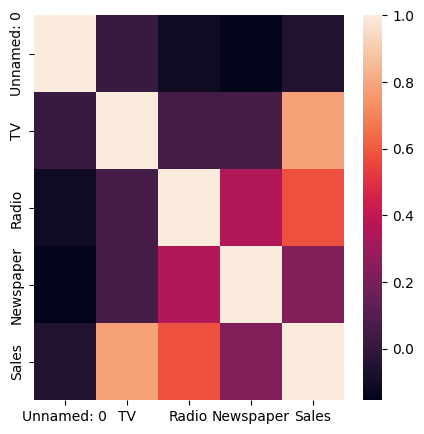

In [14]:
pl.figure(figsize=(5,5))
sns.heatmap(df.corr())
pl.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Visualization

Text(0, 0.5, 'Sales')

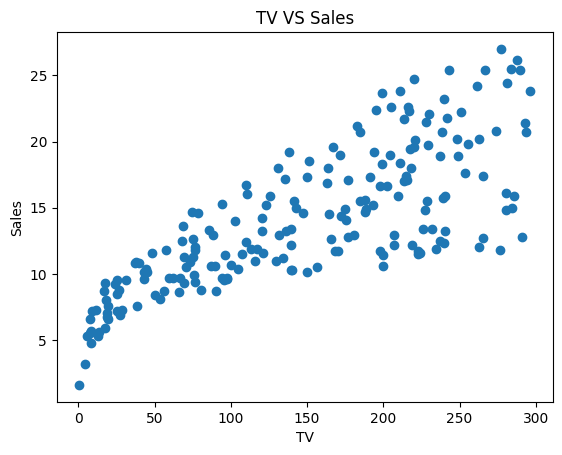

In [16]:
pl.scatter(df.TV,df.Sales)
pl.title("TV VS Sales")
pl.xlabel("TV")
pl.ylabel("Sales")

Text(0, 0.5, 'Sales')

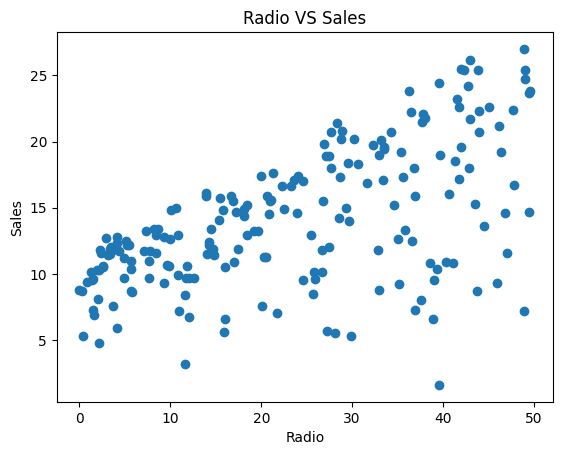

In [17]:
pl.scatter(df.Radio,df.Sales)
pl.title("Radio VS Sales")
pl.xlabel("Radio")
pl.ylabel("Sales")

Text(0, 0.5, 'Sales')

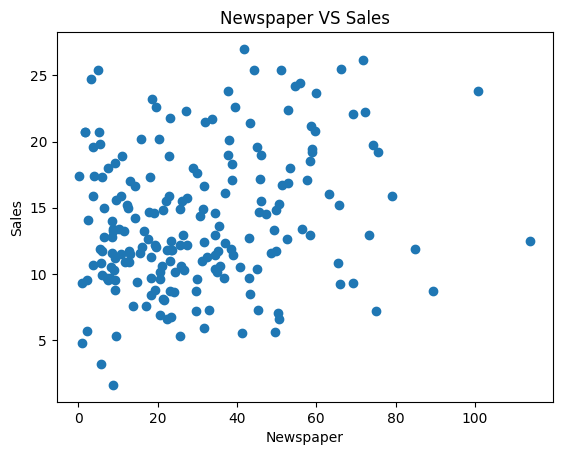

In [18]:
pl.scatter(df.Newspaper,df.Sales)
pl.title("Newspaper VS Sales")
pl.xlabel("Newspaper")
pl.ylabel("Sales")

Text(0, 0.5, 'Sales')

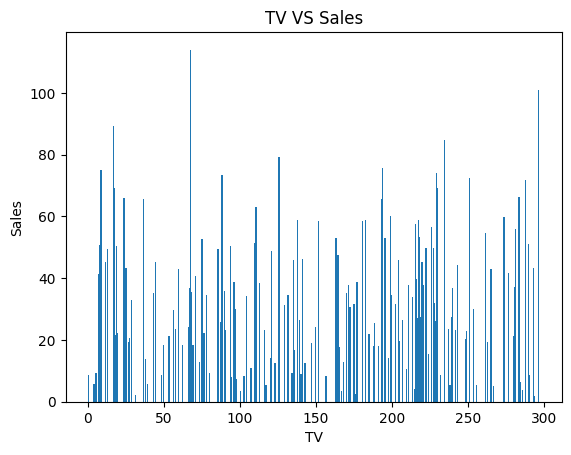

In [19]:
pl.bar(df.TV,df.Newspaper)
pl.title("TV VS Sales")
pl.xlabel("TV")
pl.ylabel("Sales")

# Machine Learning Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model= LinearRegression()

In [22]:
x=df.drop("Sales",axis=1)
y=df["Sales"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
pred=model.predict(x_test)

In [27]:
pred

array([16.41227699, 20.84319293, 21.51186915, 10.65309994, 22.12405753,
       13.12383506, 21.03748883,  7.50385439, 13.64787029, 15.12040886,
        9.02055551,  6.70666642, 14.40155146,  8.88609041,  9.74353333,
       12.21551975,  8.71370868, 16.2941451 , 10.26802337, 18.80498245,
       19.58864662, 13.22318303, 12.3647867 , 21.31473607,  7.79734749,
        5.78189965, 20.74934811, 11.95476656,  9.199109  ,  8.52178704,
       12.40431294,  9.94865202, 21.36880272, 12.25374832, 18.29943527,
       20.13347356, 14.07464638, 20.88594679, 11.05214979,  4.55168744])

In [28]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [29]:
model.score(x_train,y_train)

0.8957553000540606

In [30]:
model.score(x_test,y_test)

0.898648915141708

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

3.1990044685889067

# Scalling


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
x_train= scaler.fit_transform(x_train,y_train)

In [39]:
x_train

array([[-3.39167429e-01, -4.04248386e-01, -1.02823707e+00,
        -3.37675384e-01],
       [ 1.65444436e+00,  3.20607716e-01, -9.19827737e-01,
        -1.16143931e+00],
       [-1.03186305e+00, -1.27051084e+00,  2.59123702e-01,
         2.54250789e-01],
       [-1.26839326e+00, -1.04235941e+00, -6.96233499e-01,
        -5.74445854e-01],
       [ 3.87318222e-01,  8.79103401e-01, -1.38734296e+00,
        -7.07629243e-01],
       [ 1.62065433e+00, -1.32873699e+00, -1.29926038e+00,
        -7.96418169e-01],
       [-1.18391819e+00, -9.43731452e-01, -4.65863678e-01,
         5.35415722e-01],
       [-1.35286834e+00, -3.23140256e-02,  6.94073782e-02,
        -5.34984109e-01],
       [ 7.42113539e-01, -5.39713297e-01, -1.16374872e+00,
         2.19721762e-01],
       [-2.20902323e-01, -8.75998996e-01,  3.13328366e-01,
        -6.87898371e-01],
       [ 2.52158101e-01, -8.53421511e-01,  1.62101588e+00,
         2.24654481e-01],
       [ 1.24896399e+00,  2.18414888e-01, -1.06889056e+00,
      

In [43]:
x_test = scaler.transform(x_test)

In [44]:
x_test

array([[-0.06884719,  0.15781217,  0.59112727,  1.13227461],
       [-1.4204484 ,  0.53925283,  1.68199613,  1.13227461],
       [-1.16702317,  1.69783431,  0.36753303,  0.65380096],
       [ 0.99553877, -1.64363349,  0.95023317,  0.75245532],
       [ 0.48868831,  0.83513672,  1.77007871, -1.31928629],
       [ 0.26905312, -0.89025846,  0.82149709,  1.12240918],
       [-0.50811758,  0.79354661,  1.42452397, -0.13543394],
       [ 1.19827895, -1.18851892, -0.76398933, -0.56951314],
       [ 1.26585901,  0.86009078, -1.31958713, -0.8309472 ],
       [-0.91359794,  0.29803023, -0.02545078,  0.07667294],
       [-0.55880263, -1.40835233,  0.11683646, -1.36861347],
       [ 1.40101913, -1.11484502, -1.16374872, -0.01211599],
       [ 1.11380387,  1.00387371, -1.31958713,  2.70581169],
       [-0.35606244, -1.71849568,  0.47594236, -1.01345777],
       [ 1.46859919, -0.12500054, -1.40766971, -0.16503025],
       [ 1.31654405,  0.23980408, -1.02146148,  0.25918351],
       [-0.72775278, -1.

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
pred = model.predict(x_test)

In [49]:
pred

array([16.41227699, 20.84319293, 21.51186915, 10.65309994, 22.12405753,
       13.12383506, 21.03748883,  7.50385439, 13.64787029, 15.12040886,
        9.02055551,  6.70666642, 14.40155146,  8.88609041,  9.74353333,
       12.21551975,  8.71370868, 16.2941451 , 10.26802337, 18.80498245,
       19.58864662, 13.22318303, 12.3647867 , 21.31473607,  7.79734749,
        5.78189965, 20.74934811, 11.95476656,  9.199109  ,  8.52178704,
       12.40431294,  9.94865202, 21.36880272, 12.25374832, 18.29943527,
       20.13347356, 14.07464638, 20.88594679, 11.05214979,  4.55168744])

In [50]:
model.score(x_test,y_test)

0.8986489151417081

In [52]:
coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,0.038093
TV,3.763257
Radio,2.793135
Newspaper,0.061746
